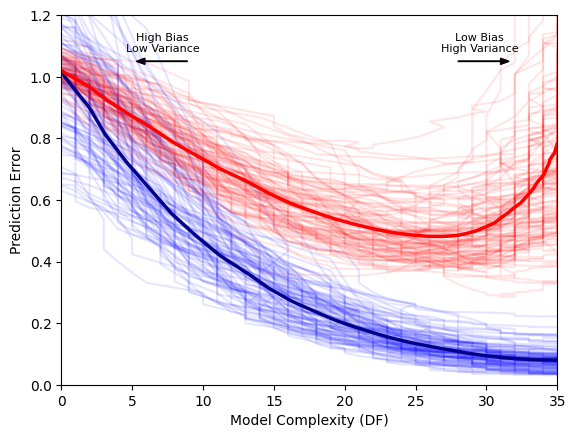

In [1]:
from sklearn.linear_model import LassoLars
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Parameters
train_size = 50
test_size = 1000
N = train_size + test_size
num_variables = 35
num_iterations = 100
alpha_values = np.logspace(-6, 1, 100)

np.random.seed(7)
sd_X = 1
sd_beta = 0.145
sd_noise = 0.45

train_RSS_all = []
test_RSS_all = []
complexities = []

plt.ylim(0, 1.2)
plt.xlim(0, num_variables)
plt.xlabel('Model Complexity (DF)')
plt.ylabel('Prediction Error')

#population to draw from
beta = np.random.normal(0, sd_beta, size=(num_variables, 1))

for i in range(num_iterations):
    noise = np.random.normal(0, sd_noise, size=(N, 1))
    X = np.random.normal(0, sd_X, size=(N, num_variables))
    Y = X @ beta + noise

    train_X = X[:train_size, :]
    test_X = X[train_size:, :]
    train_Y = Y[:train_size]
    test_Y = Y[train_size:]

    scaler = StandardScaler()
    train_X = scaler.fit_transform(train_X)
    test_X = scaler.transform(test_X)

    train_RSS = []
    test_RSS = []
    complexity = []

    #fitting Lasso for each alpha and calculate RSS
    for alpha in alpha_values:
        model = LassoLars(alpha=alpha, fit_intercept=False)
        model.fit(train_X, train_Y.ravel())

        train_pred = model.predict(train_X)
        test_pred = model.predict(test_X)

        train_RSS.append(mean_squared_error(train_Y, train_pred))
        test_RSS.append(mean_squared_error(test_Y, test_pred))

        complexity.append(np.sum(model.coef_ != 0))

    train_RSS_all.append(train_RSS)
    test_RSS_all.append(test_RSS)
    complexities.append(complexity)

    plt.plot(complexity, train_RSS, alpha=0.1, color="blue")
    plt.plot(complexity, test_RSS, alpha=0.1, color="red")

#calculating average RSS values across all iterations
train_RSS_avg = np.mean(train_RSS_all, axis=0)
test_RSS_avg = np.mean(test_RSS_all, axis=0)
complexity_avg = np.mean(complexities, axis=0)

#plotting averages 
plt.plot(complexity_avg, train_RSS_avg, color="darkblue", linewidth=2.5)
plt.plot(complexity_avg, test_RSS_avg, color="red", linewidth=2.5)

#graph annotations 
plt.text(7.15, 1.08, 'High Bias\nLow Variance', fontsize=8, ha='center')
plt.arrow(8.9, 1.05, -3, 0, head_width=0.02, head_length=0.6, fc='black', ec='black')
plt.text(29.5, 1.08, 'Low Bias\nHigh Variance', fontsize=8, ha='center')
plt.arrow(28, 1.05, 3, 0, head_width=0.02, head_length=0.6, fc='black', ec='black')

plt.show()